# Data Cleaning

### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import csv

### Loading the Csvs and combining into a single dataframe

In [3]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'

In [4]:
df = pd.read_csv(open(cur_path+'/Data2016_Uncleaned.csv','rU'), encoding='utf-8')

### CLEANING

In [5]:
df.shape

(5617658, 109)

### Getting rid of columns having 98% or more missing data

In [6]:
missing_data = df.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/df.shape[0])*100
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent<99.38)]
len(features)

62

In [7]:
d = df[features]

In [8]:
#d[['UniqueCarrier','AirlineID','Carrier','TailNum','FlightNum']]
#d[['OriginAirportID','OriginAirportSeqID','OriginCityMarketID','Origin','OriginCityName','OriginState','OriginStateName']]
#d[['CRSDepTime','DepTime','DepDelayMinutes','DepDel15','CRSArrTime','ArrTime','ArrDelayMinutes','ArrDel15','CRSElapsedTime','ActualElapsedTime']]

In [11]:
d.columns

Index(['Year', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState',
       'DestStateFips', 'DestStateName', 'DestWac', 'DestAirportSeqID',
       'CRSDepTime', 'CRSArrTime', 'ArrTimeBlk', 'Cancelled', 'Diverted',
       'Flights', 'DistanceGroup', 'DivAirportLandings', 'DepTimeBlk',
       'DestAirportID', 'Distance', 'OriginStateName', 'OriginWac', 'Month',
       'DayofMonth', 'DayOfWeek', 'FlightDate', 'UniqueCarrier', 'AirlineID',
       'Carrier', 'Quarter', 'Origin', 'OriginStateFips', 'OriginState',
       'OriginCityName', 'FlightNum', 'OriginCityMarketID',
       'OriginAirportSeqID', 'OriginAirportID', 'CRSElapsedTime', 'TailNum',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'WheelsOff', 'TaxiOut', 'TaxiIn', 'WheelsOn',
       'ArrTime', 'ArrivalDelayGroups', 'ActualElapsedTime', 'AirTime',
       'ArrDel15', 'ArrDelayMinutes', 'ArrDelay', 'SecurityDelay',
       'LateAircraftDelay', 'WeatherDelay', 'CarrierDelay', 'NASDelay

In [9]:
d.isnull().sum()

Year                          0
DestCityMarketID              0
Dest                          0
DestCityName                  0
DestState                     0
DestStateFips                 0
DestStateName                 0
DestWac                       0
DestAirportSeqID              0
CRSDepTime                    0
CRSArrTime                    0
ArrTimeBlk                    0
Cancelled                     0
Diverted                      0
Flights                       0
DistanceGroup                 0
DivAirportLandings            0
DepTimeBlk                    0
DestAirportID                 0
Distance                      0
OriginStateName               0
OriginWac                     0
Month                         0
DayofMonth                    0
DayOfWeek                     0
FlightDate                    0
UniqueCarrier                 0
AirlineID                     0
Carrier                       0
Quarter                       0
                         ...   
OriginSt

### Taking only the columns relevant for the delay

In [ ]:
#dt = d[['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate','UniqueCarrier','AirlineID','Carrier','TailNum','FlightNum','OriginAirportID','Origin','Dest','CRSDepTime','DepTime','DepDelayMinutes','DepDel15','CRSArrTime','ArrTime','ArrDelayMinutes','ArrDel15','CRSElapsedTime','ActualElapsedTime','DestAirportID','OriginCityName','OriginState','OriginStateName','DestCityName','DestState','DestStateName','Cancelled','TaxiOut','TaxiIn','WheelsOff','WheelsOn','Diverted','WeatherDelay','CarrierDelay','NASDelay','SecurityDelay','LateAircraftDelay']]

In [19]:
pp = features.tolist()
p = ['TailNum','Carrier','OriginAirportSeqID','OriginCityMarketID','OriginStateFips','OriginWac','DestAirportSeqID','DestCityMArketID','DestStateFips','DestWac','DepTimeBlk','SecurityDelay','LateAircraftDelay', 'WeatherDelay', 'CarrierDelay', 'NASDelay',
       'CancellationCode']
for i in p:
    if i in pp:
        pp.remove(i)

In [28]:
dt= d[pp]

In [29]:
len(dt.columns)

46

In [30]:
dt.columns

Index(['Year', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState',
       'DestStateName', 'CRSDepTime', 'CRSArrTime', 'ArrTimeBlk', 'Cancelled',
       'Diverted', 'Flights', 'DistanceGroup', 'DivAirportLandings',
       'DestAirportID', 'Distance', 'OriginStateName', 'Month', 'DayofMonth',
       'DayOfWeek', 'FlightDate', 'UniqueCarrier', 'AirlineID', 'Quarter',
       'Origin', 'OriginState', 'OriginCityName', 'FlightNum',
       'OriginAirportID', 'CRSElapsedTime', 'DepTime', 'DepDelay',
       'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'WheelsOff',
       'TaxiOut', 'TaxiIn', 'WheelsOn', 'ArrTime', 'ArrivalDelayGroups',
       'ActualElapsedTime', 'AirTime', 'ArrDel15', 'ArrDelayMinutes',
       'ArrDelay'],
      dtype='object')

In [31]:
dt.shape

(5617658, 46)

In [32]:
dt.isnull().sum()

Year                        0
DestCityMarketID            0
Dest                        0
DestCityName                0
DestState                   0
DestStateName               0
CRSDepTime                  0
CRSArrTime                  0
ArrTimeBlk                  0
Cancelled                   0
Diverted                    0
Flights                     0
DistanceGroup               0
DivAirportLandings          0
DestAirportID               0
Distance                    0
OriginStateName             0
Month                       0
DayofMonth                  0
DayOfWeek                   0
FlightDate                  0
UniqueCarrier               0
AirlineID                   0
Quarter                     0
Origin                      0
OriginState                 0
OriginCityName              0
FlightNum                   0
OriginAirportID             0
CRSElapsedTime              6
DepTime                 63456
DepDelay                63456
DepDelayMinutes         63456
DepDel15  

In [33]:
dt['Flight_Status'] = 0
dt.loc[df.DepDel15==1.0 ,'Flight_Status'] = 1
dt.loc[df.ArrDel15==1.0,'Flight_Status'] = 1
dt.loc[df.Cancelled==1.0, ['Flight_Status']] = 1
dt['Flight_Status'] = df['Flight_Status'].astype(int)
dt['Status'] = np.where(dt['Flight_Status']==1,'Delayed', 'On Time')

In [34]:
dt = dt[dt['Cancelled']!=1]

In [35]:
dt.shape

(5551797, 48)

In [36]:
dt.isnull().sum()

Year                        0
DestCityMarketID            0
Dest                        0
DestCityName                0
DestState                   0
DestStateName               0
CRSDepTime                  0
CRSArrTime                  0
ArrTimeBlk                  0
Cancelled                   0
Diverted                    0
Flights                     0
DistanceGroup               0
DivAirportLandings          0
DestAirportID               0
Distance                    0
OriginStateName             0
Month                       0
DayofMonth                  0
DayOfWeek                   0
FlightDate                  0
UniqueCarrier               0
AirlineID                   0
Quarter                     0
Origin                      0
OriginState                 0
OriginCityName              0
FlightNum                   0
OriginAirportID             0
CRSElapsedTime              0
DepTime                     0
DepDelay                    0
DepDelayMinutes             0
DepDel15  

In [41]:
dt = dt[dt['ArrTime'].notnull() & dt['ArrDelayMinutes'].notnull() & dt['ActualElapsedTime'].notnull() & dt['ArrDelayMinutes'].notnull() & dt['ArrDel15'].notnull()]

In [42]:
dt.shape

(5538145, 48)

In [43]:
#dt[['ArrTime','CRSArrTime','Cancelled','ArrivalDelayGroups','ActualElapsedTime','AirTime','ArrDel15','ArrDelayMinutes','ArrDelay']][dt.ArrDel15.isnull()]

In [44]:
dt.isnull().sum()

Year                    0
DestCityMarketID        0
Dest                    0
DestCityName            0
DestState               0
DestStateName           0
CRSDepTime              0
CRSArrTime              0
ArrTimeBlk              0
Cancelled               0
Diverted                0
Flights                 0
DistanceGroup           0
DivAirportLandings      0
DestAirportID           0
Distance                0
OriginStateName         0
Month                   0
DayofMonth              0
DayOfWeek               0
FlightDate              0
UniqueCarrier           0
AirlineID               0
Quarter                 0
Origin                  0
OriginState             0
OriginCityName          0
FlightNum               0
OriginAirportID         0
CRSElapsedTime          0
DepTime                 0
DepDelay                0
DepDelayMinutes         0
DepDel15                0
DepartureDelayGroups    0
WheelsOff               0
TaxiOut                 0
TaxiIn                  0
WheelsOn    

In [45]:
del dt['Cancelled']

In [46]:
dt.columns

Index(['Year', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState',
       'DestStateName', 'CRSDepTime', 'CRSArrTime', 'ArrTimeBlk', 'Diverted',
       'Flights', 'DistanceGroup', 'DivAirportLandings', 'DestAirportID',
       'Distance', 'OriginStateName', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'UniqueCarrier', 'AirlineID', 'Quarter', 'Origin',
       'OriginState', 'OriginCityName', 'FlightNum', 'OriginAirportID',
       'CRSElapsedTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'WheelsOff', 'TaxiOut', 'TaxiIn', 'WheelsOn',
       'ArrTime', 'ArrivalDelayGroups', 'ActualElapsedTime', 'AirTime',
       'ArrDel15', 'ArrDelayMinutes', 'ArrDelay', 'Flight_Status', 'Status'],
      dtype='object')

In [31]:
# Lookup Tables

In [32]:
airport = pd.read_csv(cur_path+'/Lookup/AirportID.csv', low_memory=False)
carrier = pd.read_csv(cur_path+'/Lookup/UniqueCarrier.csv', low_memory=False)
origin = pd.read_csv(cur_path+'/Lookup/Origin.csv', low_memory=False)

In [33]:
origin_dict = origin.set_index('Code').T.to_dict('list')
airport_dict = origin.set_index('Code').T.to_dict('list')
carrier_dict = origin.set_index('Code').T.to_dict('list')

In [34]:
origin_dict['DFW'][0].split(',')[0]

'Dallas/Fort Worth'

In [75]:
dd = dt

In [76]:
dd.shape

(5538145, 47)

### Removing Outliers

In [67]:
dt[dt.DepDelayMinutes>1350].shape

(48, 47)

In [68]:
dt[dt.ArrDelayMinutes>1400].shape

(41, 47)

In [77]:
dd = dd[dd.DepDelayMinutes<1350]

In [78]:
dd = dd[dd.ArrDelayMinutes<1400]

In [103]:
dd.shape

(5538090, 47)

In [94]:
dd = dd.drop((dd.Month==4) & (dd.ArrDelayMinutes >1200))

In [102]:
dd = dd[dd.ArrDelayMinutes < 1340]

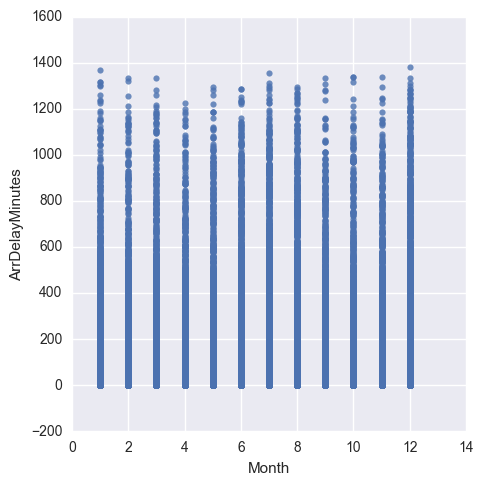

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='ArrDelayMinutes', data=dd, fit_reg=False)
plt.show()

In [ ]:
dd.to_csv(cur_path+'/Data2016_Cleaned.csv', index = False)